In [1]:
from PIL import Image
import numpy as np 
import os 


import numpy as np
import matplotlib.pyplot as pl
import torch
import ot
import ot.plot

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Enable interactive mode
%matplotlib ipympl
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
loaded_data = np.load("/home/dimakot55/output_data/gs_my/GT_lego_spheres_v5_clusters_100/cluster_51.npz") # 51, 36, 49, 24, 40,  45, 22, 20, 3, 32, 25,  19, 16, 17, 15, 13, 14

# Access the arrays by their names
gaussians_xyz = loaded_data['_xyz']
gaussians_features_dc = loaded_data['_features_dc']
gaussians_features_rest = loaded_data['_features_rest']
gaussians_rotation = loaded_data['_rotation']
gaussians_scaling = loaded_data['_scaling']
gaussians_opacity = loaded_data['_opacity']


In [3]:
# 1. Remove poitns that are too far away from all othe points. These are just noise
# Compute all pairwise distances between points
# from scipy.spatial import distance
# k=30
# pairwise_distances = distance.cdist(gaussians_xyz, gaussians_xyz, 'euclidean')
# # Use np.partition to find the k-th smallest distances for each row
# kth_nearest_indices = np.argpartition(pairwise_distances, k, axis=1)[:, :k]
# kth_nearest_distances = np.take_along_axis(pairwise_distances, kth_nearest_indices, axis=1)
# q_outliers = np.quantile(np.max(kth_nearest_distances, axis=-1), 0.925)
# idcs_relevant = np.where(np.max(kth_nearest_distances, axis=-1) < q_outliers)[0]
# gaussians_xyz = loaded_data['_xyz'][idcs_relevant]
# gaussians_features_dc = loaded_data['_features_dc'][idcs_relevant]
# gaussians_features_rest = loaded_data['_features_rest'][idcs_relevant]
# gaussians_rotation = loaded_data['_rotation'][idcs_relevant]
# gaussians_scaling = loaded_data['_scaling'][idcs_relevant]
# gaussians_opacity = loaded_data['_opacity'][idcs_relevant]

# preprocess colors
colors = np.array(gaussians_features_dc[:,0])
colors = (colors - np.min(colors)) / (np.max(colors) - np.min(colors))

# preprocess sizes. Transform scaling to a format somewhat acceptable 
# by the ax.scatter function
sizes = np.array(gaussians_scaling[:,0])
q05 = np.quantile(sizes, 0.5)
#sizes = sizes * (sizes > q05)
sizes = -sizes * 4. 

# Transform opacity to the format acceptable by ax.scatter
alpha = np.array(gaussians_opacity[:,0])
#alpha = alpha / np.max(alpha)
alpha = np.clip(alpha, 0., 1.)



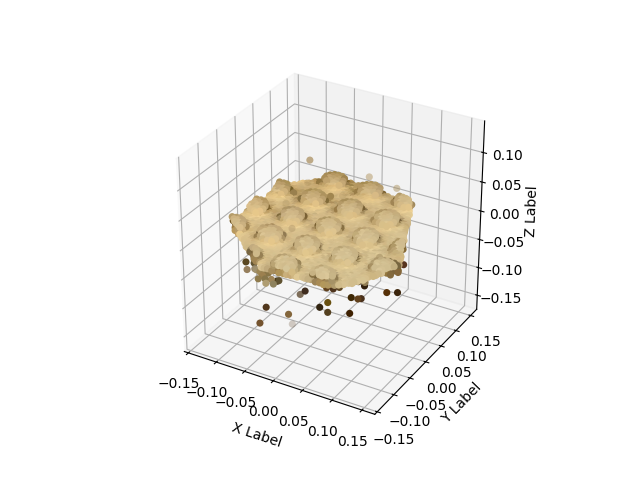

In [4]:

# Functions from @Mateen Ulhaq and @karlo
def set_axes_equal(ax: plt.Axes):
    """Set 3D plot axes to equal scale.

    Make axes of 3D plot have equal scale so that spheres appear as
    spheres and cubes as cubes.  Required since `ax.axis('equal')`
    and `ax.set_aspect('equal')` don't work on 3D.
    """
    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])
    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    _set_axes_radius(ax, origin, radius)

def _set_axes_radius(ax, origin, radius):
    x, y, z = origin
    ax.set_xlim3d([x - radius, x + radius])
    ax.set_ylim3d([y - radius, y + radius])
    ax.set_zlim3d([z - radius, z + radius])


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.axis('equal')
#ax.set_aspect('equal')
# Plot the scatter points
ax.scatter(gaussians_xyz[:,0], 
           gaussians_xyz[:,1], 
           gaussians_xyz[:,2], 
           c=np.concatenate([colors, alpha[:,None]], axis=-1),# c='b', 
           marker='o',
           s=sizes, #s=25.,
           #alpha=alpha,
           depthshade=False,
           edgecolors='none')
           #fillstyle='full',
           #markeredgecolor='red',
           #markeredgewidth=0.0)

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_box_aspect([1,1,1]) # IMPORTANT - this is the new, key line
# ax.set_proj_type('ortho') # OPTIONAL - default is perspective (shown in image above)
set_axes_equal(ax) # IMPORTANT - this is also required
plt.show()